# Analysis of each country's vaccination status

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

# pandas.read_csv
describe your dataset and the questions you were asking, and show the pandas code you wrote to read it in and show the columns and index and the table itself 

In [2]:
df = pd.read_csv('country_vaccinations.csv')
df #showing the table itself

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.00,0.00,NaN,NaN,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81971,Zimbabwe,ZWE,2022-03-03,7921113.0,4372925.0,3406482.0,10373.0,8903.0,52.48,28.97,22.57,590.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",Ministry of Health,https://www.arcgis.com/home/webmap/viewer.html...
81972,Zimbabwe,ZWE,2022-03-04,7930621.0,4374896.0,3408609.0,9508.0,8603.0,52.55,28.99,22.59,570.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",Ministry of Health,https://www.arcgis.com/home/webmap/viewer.html...
81973,Zimbabwe,ZWE,2022-03-05,7936145.0,4377373.0,3410340.0,5524.0,8458.0,52.58,29.00,22.60,560.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",Ministry of Health,https://www.arcgis.com/home/webmap/viewer.html...
81974,Zimbabwe,ZWE,2022-03-06,7938362.0,4378029.0,3410960.0,2217.0,8017.0,52.60,29.01,22.60,531.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",Ministry of Health,https://www.arcgis.com/home/webmap/viewer.html...


In [3]:
df.columns #showing the columns

Index(['country', 'iso_code', 'date', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated',
       'daily_vaccinations_raw', 'daily_vaccinations',
       'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred',
       'people_fully_vaccinated_per_hundred', 'daily_vaccinations_per_million',
       'vaccines', 'source_name', 'source_website'],
      dtype='object')

In [4]:
df.describe()

,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
count,4.187300e+04,3.963800e+04,3.711900e+04,3.403300e+04,8.169700e+04,41873.000000,39638.000000,37119.000000,81697.000000
mean,4.266144e+07,1.664001e+07,1.306131e+07,2.725470e+05,1.343912e+05,76.609732,39.746849,34.202816,3338.877535
std,2.125270e+08,6.650941e+07,5.247098e+07,1.227710e+06,7.842023e+05,65.730864,29.015166,27.998302,3970.621259
min,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,4.992060e+05,3.329422e+05,2.267500e+05,5.008000e+03,9.550000e+02,14.580000,10.500000,6.325000,685.000000
50%,3.351838e+06,2.056976e+06,1.585259e+06,2.571100e+04,7.660000e+03,62.920000,39.300000,29.430000,2161.000000
75%,1.598427e+07,8.604462e+06,6.848700e+06,1.261760e+05,4.518000e+04,128.130000,66.750000,60.070000,4800.000000
max,3.165486e+09,1.269302e+09,1.234540e+09,2.474100e+07,2.242429e+07,336.160000,124.650000,121.530000,117497.000000


# pandas.pivot_table
Index is the date, while the column shows the number of fully vaccinated people specfically in the USA. The data ranges from 12/13/2020 to 03/07/2022 and there's a gigantic increase in the amount of fully vaccinated people (from 5,527 to 215,398,091).

In [21]:
column = 'people_fully_vaccinated'
df2 = pd.pivot_table(df, values=column, index=["date"], columns=["country"])
df2

country,Afghanistan,Albania,Algeria,Andorra,Angola,Anguilla,Antigua and Barbuda,Argentina,Armenia,Aruba,...,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,Wales,Wallis and Futuna,Yemen,Zambia,Zimbabwe
date,,,,,,,,,,,,,,,,,,,,,
2020-12-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-12-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-12-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-12-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-12-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36172802.0,NaN,80528.0,...,NaN,NaN,NaN,NaN,NaN,2387565.0,NaN,NaN,NaN,3406482.0
2022-03-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36206509.0,NaN,80551.0,...,NaN,NaN,NaN,NaN,NaN,2388059.0,NaN,NaN,NaN,3408609.0
2022-03-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,77419867.0,2388842.0,NaN,NaN,1983053.0,3410340.0


In [24]:
df2[['United States','Mexico', 'Canada']]

country,United States,Mexico,Canada,Guatemala,Cuba
date,,,,,
2020-12-13,5527.0,NaN,NaN,NaN,NaN
2020-12-14,5645.0,NaN,NaN,NaN,NaN
2020-12-15,5904.0,NaN,NaN,NaN,NaN
2020-12-16,6369.0,NaN,NaN,NaN,NaN
2020-12-17,7107.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2022-03-03,215311180.0,79014513.0,NaN,NaN,NaN
2022-03-04,215371290.0,79050604.0,30951203.0,5716727.0,9888135.0
2022-03-05,215396034.0,NaN,30958624.0,NaN,9888591.0


# pandas.plot
show the plot you made from the pivot table (pandas.plot) the plot should have labels on the axes and a title and a legend

Text(0, 0.5, 'Number of people (unit = one hundred million)')

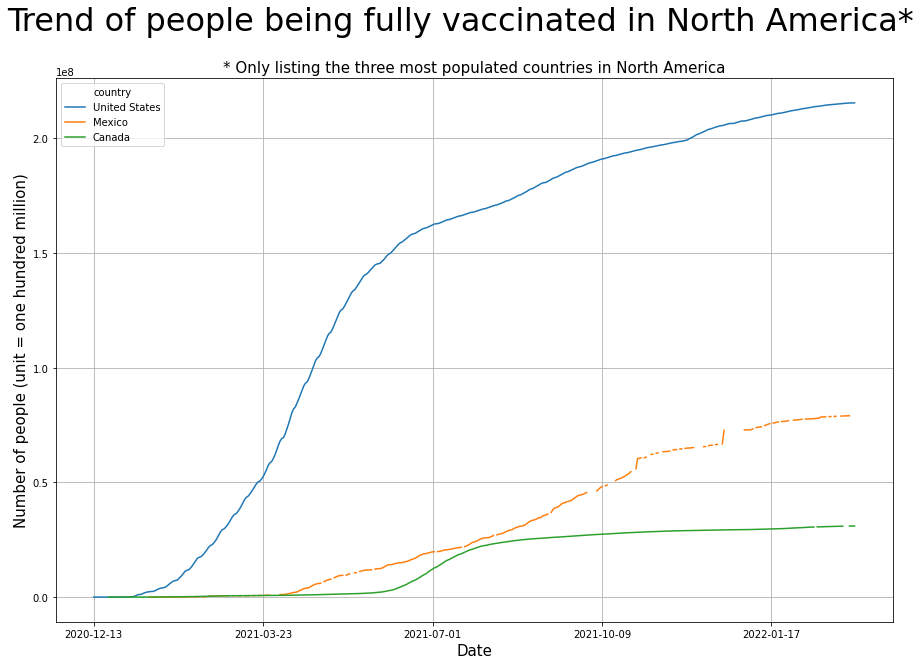

In [31]:
df2[['United States','Mexico', 'Canada']].plot(figsize=(15,10))
plt.grid()
plt.suptitle('Trend of people being fully vaccinated in North America*', fontsize=32)
plt.title('* Only listing the three most populated countries in North America', fontsize=15)
plt.xlabel('Date', fontsize=15)
plt.ylabel('Number of people (unit = one hundred million)', fontsize=15)

# pandas.groupby
show your use of groupby and interpret the results


Text(0, 0.5, 'Number of vaccinations')

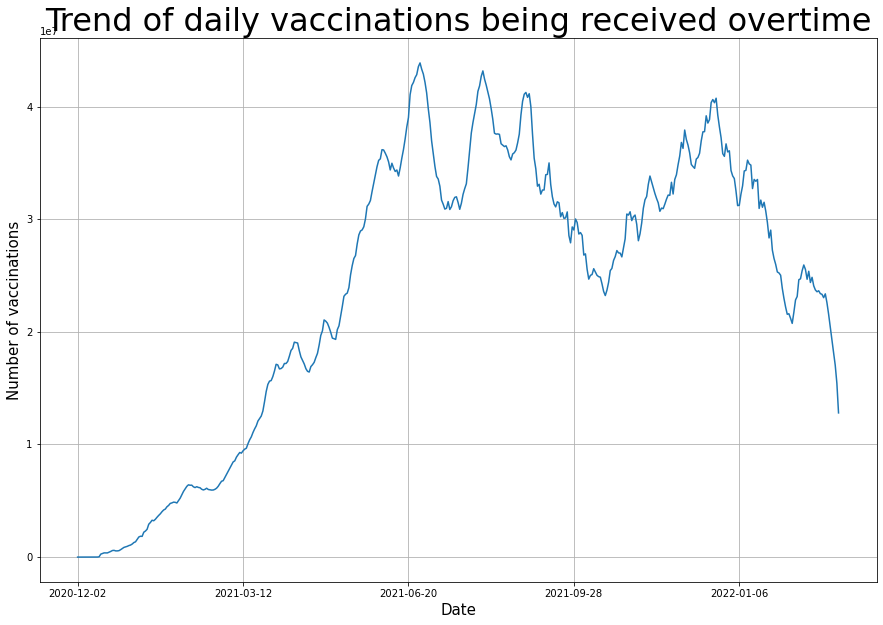

In [33]:
df3 = df.groupby(['date']).daily_vaccinations.agg(sum)
df3.plot(figsize=(15,10))
plt.grid()
plt.title('Trend of daily vaccinations being received overtime', fontsize=32)
plt.xlabel('Date', fontsize=15)
plt.ylabel('Number of vaccinations', fontsize=15)

# pandas.analysis
describe what your analysis tells you about the questions you asked 